In [215]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score  

In [216]:
df = pd.read_csv("csv/gameandgrade.csv")

In [217]:
df.head()

,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade
0,0,1,1,2,1,1,4,4,5,77.50
1,1,1,1,3,1,1,1,3,3,83.00
2,0,1,0,0,0,0,1,3,3,80.00
3,0,1,3,5,1,1,2,2,3,45.00
4,1,1,1,1,2,1,1,3,4,85.00


In [218]:
df['Grade'] = pd.to_numeric(df['Grade'], errors='coerce')

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sex               770 non-null    int64  
 1   School Code       770 non-null    int64  
 2   Playing Years     770 non-null    int64  
 3   Playing Often     770 non-null    int64  
 4   Playing Hours     770 non-null    int64  
 5   Playing Games     770 non-null    int64  
 6   Parent Revenue    770 non-null    int64  
 7   Father Education  770 non-null    int64  
 8   Mother Education  770 non-null    int64  
 9   Grade             769 non-null    float64
dtypes: float64(1), int64(9)
memory usage: 60.3 KB


In [220]:
df.isnull().sum()

Sex                 0
School Code         0
Playing Years       0
Playing Often       0
Playing Hours       0
Playing Games       0
Parent Revenue      0
Father Education    0
Mother Education    0
Grade               1
dtype: int64

In [221]:
df.dropna(inplace=True)

In [222]:
df.isnull().sum()

Sex                 0
School Code         0
Playing Years       0
Playing Often       0
Playing Hours       0
Playing Games       0
Parent Revenue      0
Father Education    0
Mother Education    0
Grade               0
dtype: int64

In [223]:
df.duplicated().sum()

np.int64(16)

In [224]:
df = df[~df.duplicated()]

In [225]:
df.duplicated().sum()

np.int64(0)

In [226]:
X = df[["Playing Hours"]]  # Feature (independent variable)
Y = df["Grade"]  # Target (dependent variable)

In [227]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [228]:
print("Training Set:")
print(X_train)
print(Y_train)

print("\nTesting Set:")
print(X_test)
print(Y_test)

Training Set:
     Playing Hours
593              3
131              1
44               3
70               0
588              2
..             ...
71               2
106              0
270              0
439              2
102              1

[602 rows x 1 columns]
593     87.00
131     57.75
44      69.00
70      90.00
588     60.00
        ...  
71      70.00
106     72.50
270     70.00
439    100.00
102     70.00
Name: Grade, Length: 602, dtype: float64

Testing Set:
     Playing Hours
732              0
667              2
374              2
77               2
212              1
..             ...
333              2
90               0
357              0
668              0
69               2

[151 rows x 1 columns]
732     70.5
667     72.5
374     55.0
77      85.0
212     55.0
       ...  
333     92.5
90     100.0
357     70.0
668     46.5
69      65.0
Name: Grade, Length: 151, dtype: float64


In [229]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [230]:
print(f"Intercept (b): {model.intercept_:.2f}")
print(f"Coefficient (m): {model.coef_[0]:.2f}")

Intercept (b): 79.04
Coefficient (m): -1.20


In [231]:
Y_pred = model.predict(X_test)

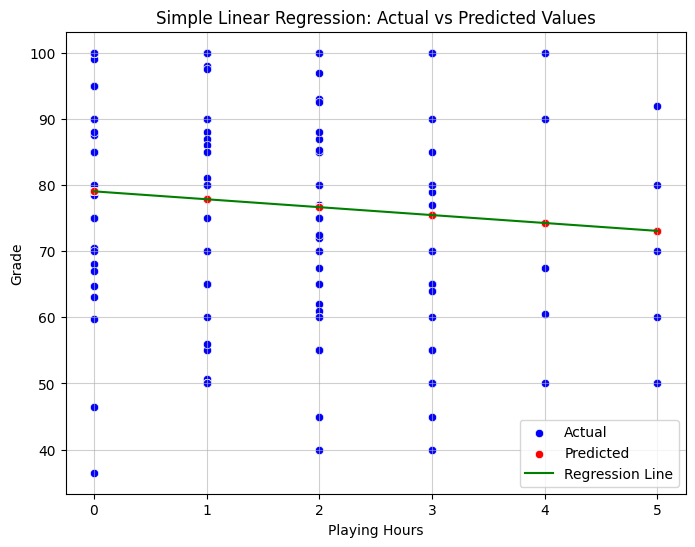

In [232]:
plt.figure(figsize=(8,6))


sns.scatterplot(x=X_test.values.flatten(), y=Y_test.values.flatten(), color="blue", label="Actual")
sns.scatterplot(x=X_test.values.flatten(), y=Y_pred.flatten(), color="red", label="Predicted")

X_line = pd.DataFrame(np.linspace(X_test["Playing Hours"].min(), X_test["Playing Hours"].max(), 100), columns=["Playing Hours"])
Y_line = model.predict(X_line)
plt.plot(X_line["Playing Hours"], Y_line, color='green', label='Regression Line')

plt.xlabel("Playing Hours")
plt.ylabel("Grade")
plt.title("Simple Linear Regression: Actual vs Predicted Values")
plt.legend()
plt.grid(True, alpha=0.6)
plt.show()

In [233]:
mse= mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

In [234]:
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 282.2549
R² Score: 0.0431
